# COVID-19 effect on Unemployment : part 5 - Demographics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import datetime as dt

In [2]:
# unemployment by industry (Canada) 
#https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410002201

df = pd.read_csv('1410002201_databaseLoadingData_ind2019.csv')
#df

In [3]:
# function to get a year of data for specific industry
def query_year(df, geo='Canada', sex='Both sexes', age='15 years and over', 
               labor='Unemployment rate', naics='Total, all industries', year='2020'):

    df2 = df
    df2['DATE'] = pd.to_datetime(df2.REF_DATE)
    df2.DATE = df2.DATE.dt.strftime("%m")
    df2 = df2.loc[((df2.GEO == geo) & 
                   (df2.Sex == sex) &
                   (df2['Age group'] == age) &
                   (df2['Labour force characteristics'] == labor) &
                   (df2['North American Industry Classification System (NAICS)'] == naics) &
                   (df2.REF_DATE.str.contains(year))
                  )]
    return df2

In [4]:
males = query_year(df, sex='Males', year='2020')
females = query_year(df, sex='Females', year='2020')

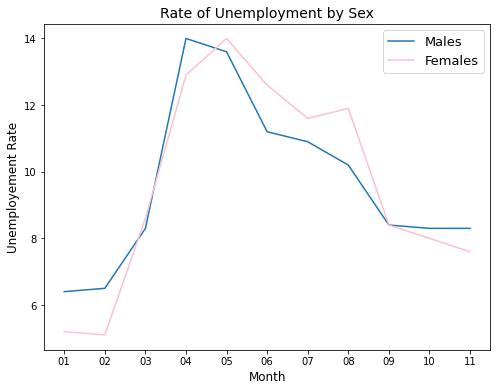

In [5]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (8,6))
ax.plot(males.DATE, males.VALUE, label = 'Males')
ax.plot(females.DATE, females.VALUE, label = 'Females', color ='pink')
plt.title('Rate of Unemployment by Sex', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.show()

In [6]:
young = query_year(df, age='15 to 24 years', year='2020')
middle_age = query_year(df, age='25 to 54 years', year='2020')
older = query_year(df, age='55 years and over', year='2020')

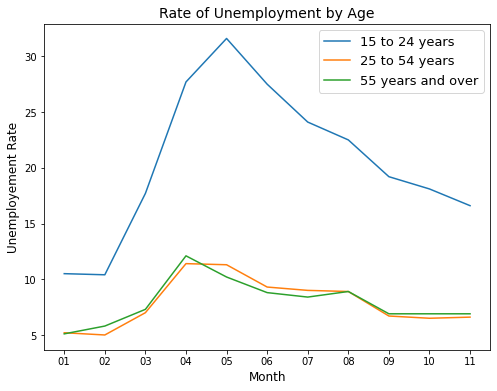

In [7]:
fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (8,6))
ax.plot(young.DATE, young.VALUE, label = '15 to 24 years')
ax.plot(middle_age.DATE, middle_age.VALUE, label = '25 to 54 years')
ax.plot(older.DATE, older.VALUE, label = '55 years and over')
plt.title('Rate of Unemployment by Age', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployement Rate', fontsize = 12)
plt.legend(fontsize = 13, loc = 'upper right')
plt.show()

In [15]:
# unemployment by occupation (Canada) 
df = pd.read_csv('1410029601_databaseLoadingData_occ2020.csv')

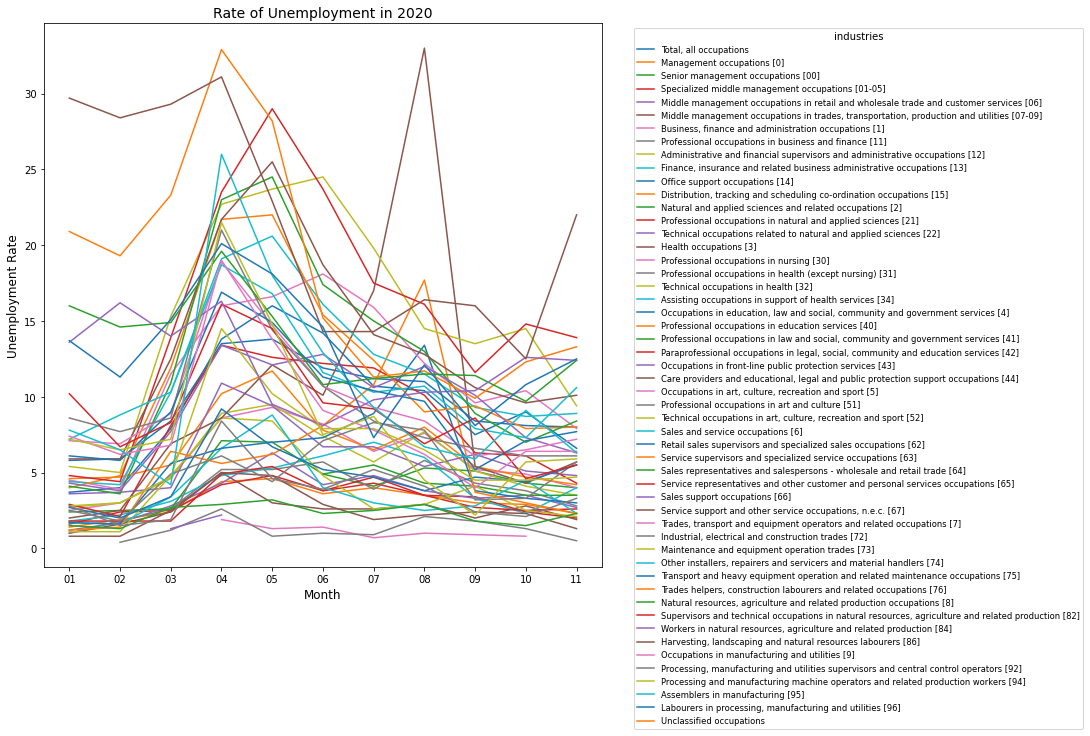

In [14]:
occupations = df['National Occupational Classification (NOC)'].unique()

df2 = df
df2['DATE'] = pd.to_datetime(df2.REF_DATE)
df2.DATE = df2.DATE.dt.strftime("%m")
df2 = df2.loc[df2.GEO == 'Canada']
df2 = df2.loc[df2.Sex == 'Both sexes']
df2 = df2.loc[df2['Labour force characteristics'] == 'Unemployment rate']
df2 = df2.loc[df2.REF_DATE.str.contains('2020')]

fig, ax = plt.subplots(nrows=1, sharey=True, figsize = (10,10))

for o in occupations:
    tmp = df2.loc[df2['National Occupational Classification (NOC)'] == o]
    ax.plot(tmp.DATE, tmp.VALUE, label = o)

plt.title('Rate of Unemployment in 2020', fontsize = 14)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Unemployment Rate', fontsize = 12)
#plt.legend(fontsize = 13, loc = 'upper right')
plt.legend(title='industries', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()